 Extracting data...
 Cleaning and transforming data...
 Loading data into SQLite database...
✅ Data successfully loaded into database.
📊 Building dashboard...


C:\Users\HP ZBOOK 15 G5\AppData\Local\Temp\ipykernel_23228\3018590671.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\HP ZBOOK 15 G5\AppData\Local\Temp\ipykernel_23228\3018590671.py:64: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


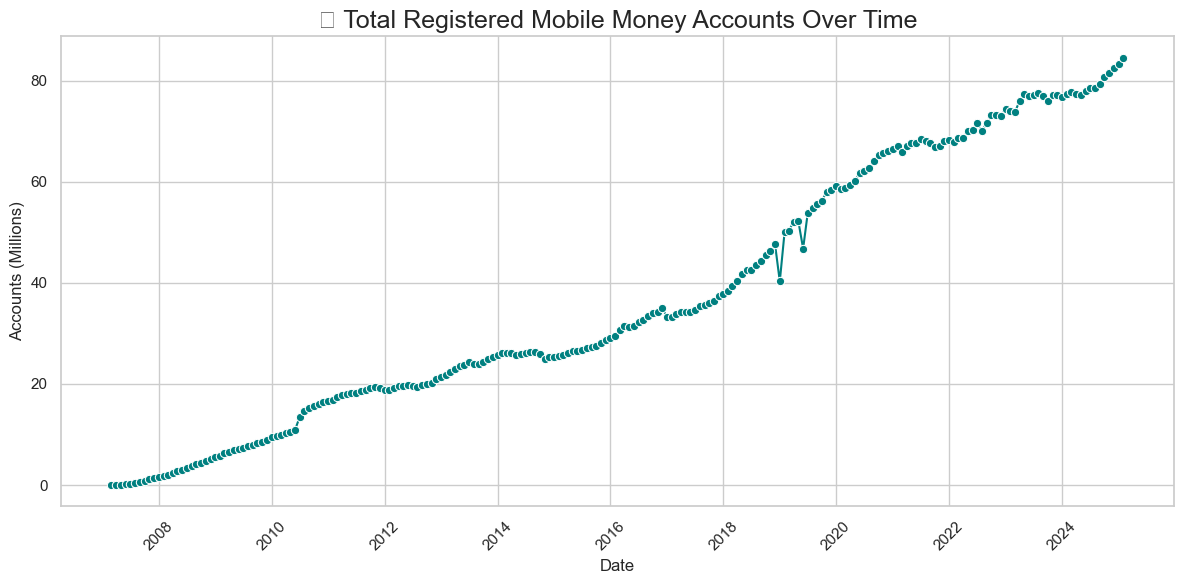

C:\Users\HP ZBOOK 15 G5\AppData\Local\Temp\ipykernel_23228\3018590671.py:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


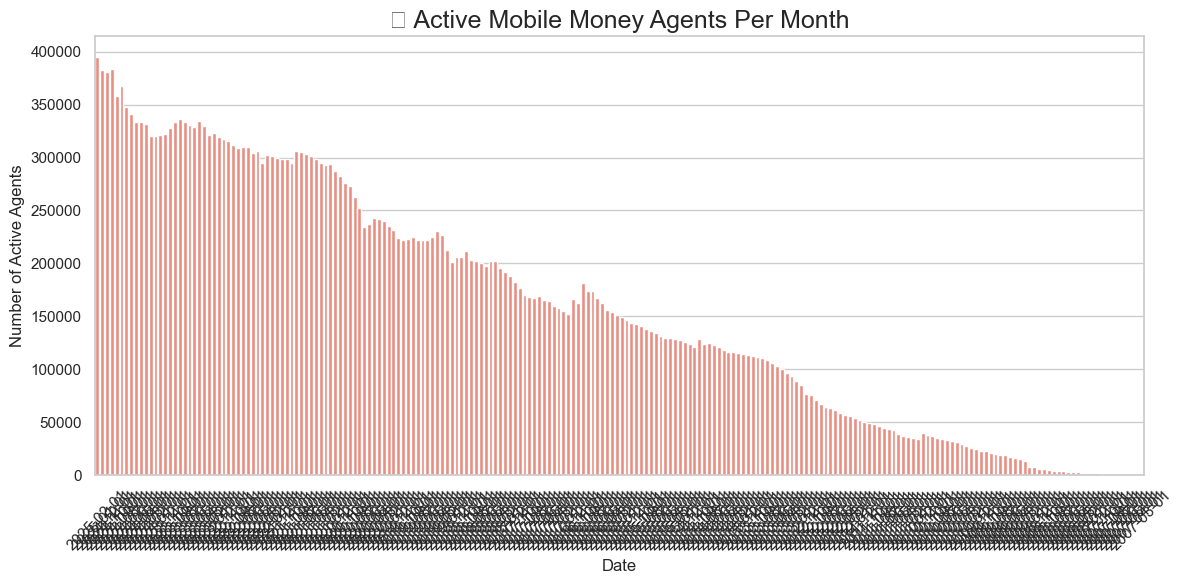

C:\Users\HP ZBOOK 15 G5\AppData\Local\Temp\ipykernel_23228\3018590671.py:86: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


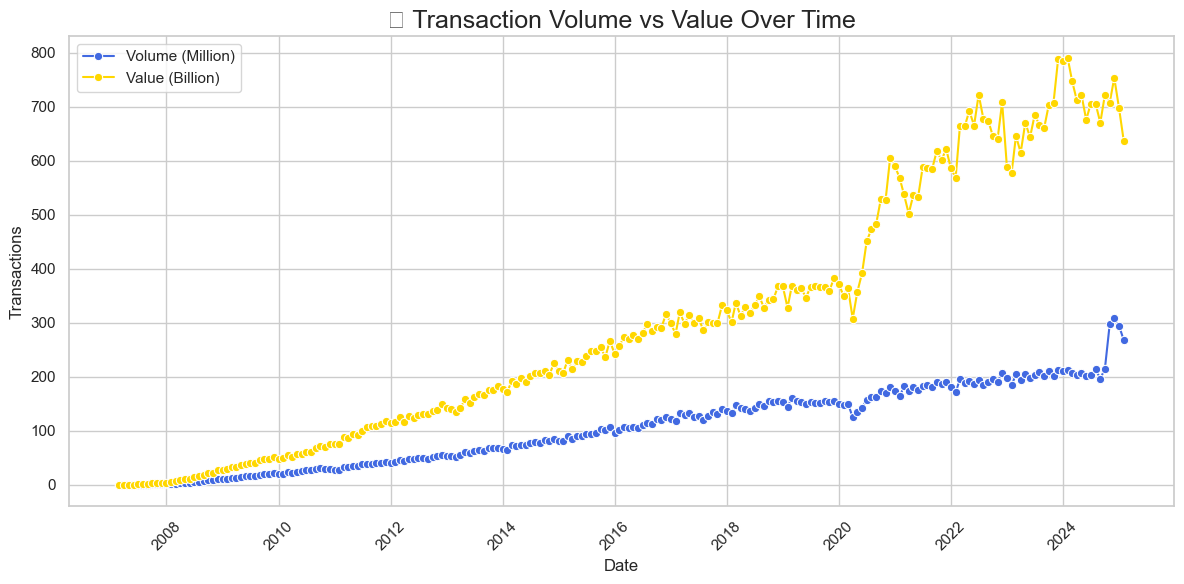

C:\Users\HP ZBOOK 15 G5\AppData\Local\Temp\ipykernel_23228\3018590671.py:94: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


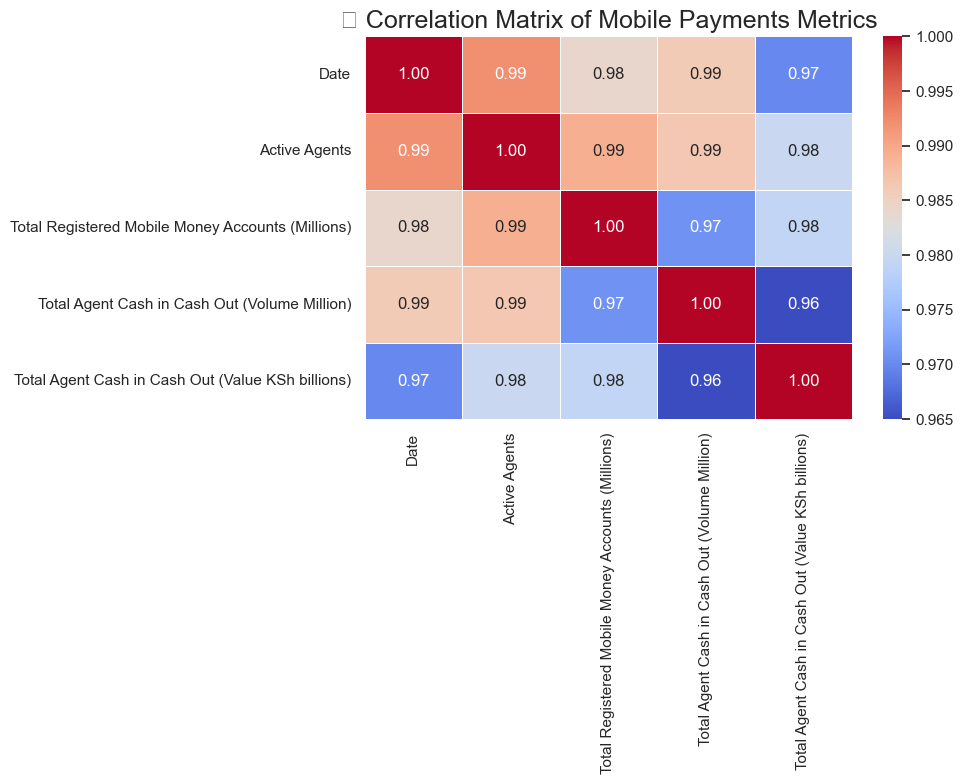

🎉 Dashboard and ETL Completed Successfully!


In [1]:
# 1. Import Libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2. Extract Data
print(" Extracting data...")
csv_file = 'mobile_payments.csv'

# Check if file exists
if not os.path.exists(csv_file):
    raise FileNotFoundError(f"{csv_file} not found. Please place it in the notebook directory.")

df = pd.read_csv(csv_file)

# 3. Transform Data
print(" Cleaning and transforming data...")

# Data type conversion
df['Year'] = df['Year'].astype(int)
df['Active Agents'] = df['Active Agents'].astype(int)
df['Total Registered Mobile Money Accounts (Millions)'] = df['Total Registered Mobile Money Accounts (Millions)'].astype(float)
df['Total Agent Cash in Cash Out (Volume Million)'] = df['Total Agent Cash in Cash Out (Volume Million)'].astype(float)
df['Total Agent Cash in Cash Out (Value KSh billions)'] = df['Total Agent Cash in Cash Out (Value KSh billions)'].astype(float)

# Handling missing values
df.fillna(method='ffill', inplace=True)

# Create 'Date' column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'] + '-01', format='%Y-%B-%d')

# Reorder columns
df = df[['Date', 'Year', 'Month', 'Active Agents',
         'Total Registered Mobile Money Accounts (Millions)',
         'Total Agent Cash in Cash Out (Volume Million)',
         'Total Agent Cash in Cash Out (Value KSh billions)']]

# 4. Load Data into SQLite
print(" Loading data into SQLite database...")

db_file = 'mobile_payments.db'
conn = sqlite3.connect(db_file)

# Save DataFrame to SQLite
df.to_sql('mobile_payments', conn, if_exists='replace', index=False)

print("✅ Data successfully loaded into database.")

# 5. Fancy Colorful Dashboard
print("📊 Building dashboard...")

# Set style
sns.set_theme(style="whitegrid", palette="pastel")

# Line plot: Total Registered Accounts Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Total Registered Mobile Money Accounts (Millions)', data=df, marker='o', color='teal')
plt.title('📈 Total Registered Mobile Money Accounts Over Time', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Accounts (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot: Active Agents Per Month
plt.figure(figsize=(12,6))
sns.barplot(x='Date', y='Active Agents', data=df, color='salmon')
plt.title('📊 Active Mobile Money Agents Per Month', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Number of Active Agents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line plot: Transaction Volume vs Value
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Total Agent Cash in Cash Out (Volume Million)', data=df, marker='o', label='Volume (Million)', color='royalblue')
sns.lineplot(x='Date', y='Total Agent Cash in Cash Out (Value KSh billions)', data=df, marker='o', label='Value (Billion)', color='gold')
plt.title('📉 Transaction Volume vs Value Over Time', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap: Correlation Matrix
plt.figure(figsize=(10,8))
corr = df.drop(columns=['Year', 'Month']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('🎨 Correlation Matrix of Mobile Payments Metrics', fontsize=18)
plt.tight_layout()
plt.show()

# Close connection
conn.close()

print("🎉 Dashboard and ETL Completed Successfully!")
